In [1]:
"""
SUPPORT VECTOR MACHINE (SVM) DESDE CERO
=======================================

Objetivos:
- Comprender SVM a través de implementación scratch
- Implementar el método de multiplicadores de Lagrange
- Trabajar con kernels lineal y polinomial
- Visualizar vectores de soporte y regiones de decisión
- Comparar con implementaciones de scikit-learn

Sprint: Modelos lineales y métodos avanzados de clasificación
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("="*80)
print("SUPPORT VECTOR MACHINE (SVM) DESDE CERO")
print("Implementación Scratch con Multiplicadores de Lagrange")
print("="*80)


SUPPORT VECTOR MACHINE (SVM) DESDE CERO
Implementación Scratch con Multiplicadores de Lagrange


In [2]:
# ============================================================================
# 1. FUNDAMENTOS TEÓRICOS DE SVM
# ============================================================================

print("📚 1. FUNDAMENTOS TEÓRICOS DE SVM")
print("="*35)

print("""
🎯 SUPPORT VECTOR MACHINE (SVM):
───────────────────────────────

📊 CONCEPTO CENTRAL:
   • Maximizar el margen entre clases
   • Encontrar el hiperplano óptimo de separación
   • Solo los vectores de soporte importan para la decisión

📈 FORMULACIÓN MATEMÁTICA:
   Minimizar: ½||w||² 
   Sujeto a: yᵢ(wᵀxᵢ) ≥ 1 para todo i
   
   Donde:
   • w: vector de pesos del hiperplano
   • xᵢ: i-ésima muestra de entrenamiento
   • yᵢ: etiqueta de la i-ésima muestra (-1 o +1)

🔄 DUALIZACIÓN CON MULTIPLICADORES DE LAGRANGE:
   Maximizar: Σᵢ λᵢ - ½ Σᵢ Σⱼ λᵢλⱼyᵢyⱼk(xᵢ,xⱼ)
   Sujeto a: λᵢ ≥ 0 y Σᵢ λᵢyᵢ = 0
   
   Donde:
   • λᵢ: multiplicador de Lagrange para la muestra i
   • k(xᵢ,xⱼ): función kernel

📉 ACTUALIZACIÓN POR DESCENSO DE GRADIENTE:
   λᵢ^new = λᵢ + α(1 - Σⱼ λⱼyⱼyᵢk(xᵢ,xⱼ))
   
   Con restricción: λᵢ ≥ 0

🔍 VECTORES DE SOPORTE:
   • Muestras con λᵢ > umbral
   • Son las únicas muestras necesarias para predicción
   • Definen completamente el modelo

🎯 PREDICCIÓN:
   f(x) = Σₙ λₙy_{svₙ}k(x,sₙ)
   Clase = sign(f(x))

🧮 FUNCIONES KERNEL:
   • Kernel Lineal: k(xᵢ,xⱼ) = xᵢᵀxⱼ
   • Kernel Polinomial: k(xᵢ,xⱼ) = (γxᵢᵀxⱼ + θ₀)^d
   • Permiten separación no lineal usando "kernel trick"

💡 VENTAJAS DE SVM:
   • Eficaz en espacios de alta dimensión
   • Usa solo vectores de soporte (eficiente en memoria)
   • Versátil con diferentes kernels
   • Funciona bien con pequeños datasets
""")

print("✅ Fundamentos teóricos establecidos")


📚 1. FUNDAMENTOS TEÓRICOS DE SVM

🎯 SUPPORT VECTOR MACHINE (SVM):
───────────────────────────────

📊 CONCEPTO CENTRAL:
   • Maximizar el margen entre clases
   • Encontrar el hiperplano óptimo de separación
   • Solo los vectores de soporte importan para la decisión

📈 FORMULACIÓN MATEMÁTICA:
   Minimizar: ½||w||² 
   Sujeto a: yᵢ(wᵀxᵢ) ≥ 1 para todo i
   
   Donde:
   • w: vector de pesos del hiperplano
   • xᵢ: i-ésima muestra de entrenamiento
   • yᵢ: etiqueta de la i-ésima muestra (-1 o +1)

🔄 DUALIZACIÓN CON MULTIPLICADORES DE LAGRANGE:
   Maximizar: Σᵢ λᵢ - ½ Σᵢ Σⱼ λᵢλⱼyᵢyⱼk(xᵢ,xⱼ)
   Sujeto a: λᵢ ≥ 0 y Σᵢ λᵢyᵢ = 0
   
   Donde:
   • λᵢ: multiplicador de Lagrange para la muestra i
   • k(xᵢ,xⱼ): función kernel

📉 ACTUALIZACIÓN POR DESCENSO DE GRADIENTE:
   λᵢ^new = λᵢ + α(1 - Σⱼ λⱼyⱼyᵢk(xᵢ,xⱼ))
   
   Con restricción: λᵢ ≥ 0

🔍 VECTORES DE SOPORTE:
   • Muestras con λᵢ > umbral
   • Son las únicas muestras necesarias para predicción
   • Definen completamente el modelo

🎯 PREDICC


📊 2. GENERACIÓN DE DATASETS DE PRUEBA
🎯 CREANDO DATASETS PARA EXPERIMENTACIÓN:
   • Dataset Lineal: 100 muestras, 2 características
   • Distribución: 50 clase -1, 50 clase +1
   • Dataset No Lineal: 150 muestras, 2 características
   • Distribución: 75 clase -1, 75 clase +1
   • Dataset Círculos: 150 muestras, 2 características
   • Distribución: 75 clase -1, 75 clase +1


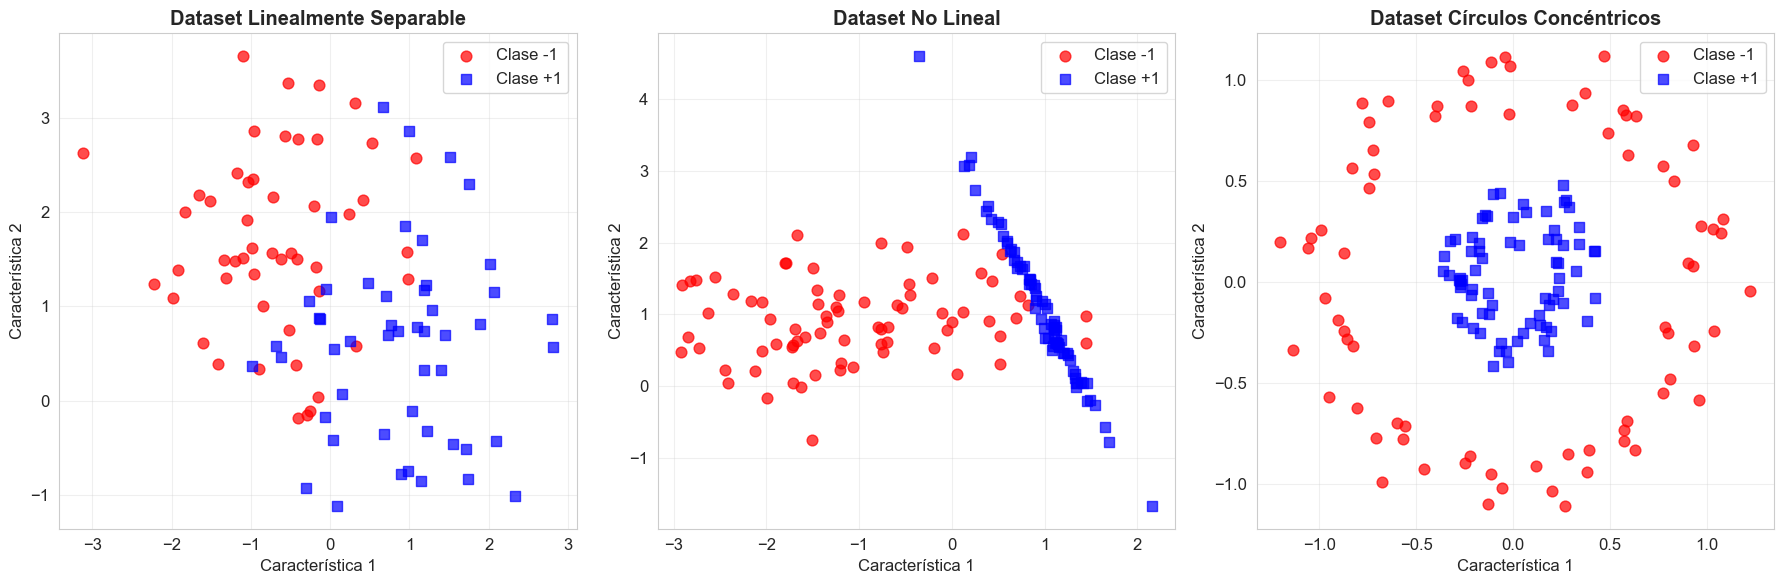

✅ Datasets generados y visualizados


In [3]:
# ============================================================================
# 2. GENERACIÓN DE DATASETS DE PRUEBA
# ============================================================================

print("\n📊 2. GENERACIÓN DE DATASETS DE PRUEBA")
print("="*40)

# Dataset simple 1: Linealmente separable
np.random.seed(42)

print("🎯 CREANDO DATASETS PARA EXPERIMENTACIÓN:")

# Dataset 1: Linealmente separable
n_samples_1 = 100
X_linear, y_linear = make_blobs(n_samples=n_samples_1, centers=2, 
                               n_features=2, random_state=42, 
                               center_box=(-2.0, 2.0), cluster_std=1.0)

# Convertir etiquetas a -1 y +1 (requerido para SVM)
y_linear = np.where(y_linear == 0, -1, 1)

print(f"   • Dataset Lineal: {X_linear.shape[0]} muestras, {X_linear.shape[1]} características")
print(f"   • Distribución: {np.sum(y_linear == -1)} clase -1, {np.sum(y_linear == 1)} clase +1")

# Dataset 2: No linealmente separable
X_nonlinear, y_nonlinear = make_classification(n_samples=150, n_features=2, 
                                              n_redundant=0, n_informative=2, 
                                              n_clusters_per_class=1, 
                                              random_state=42)
# Convertir a -1 y +1
y_nonlinear = np.where(y_nonlinear == 0, -1, 1)

print(f"   • Dataset No Lineal: {X_nonlinear.shape[0]} muestras, {X_nonlinear.shape[1]} características")
print(f"   • Distribución: {np.sum(y_nonlinear == -1)} clase -1, {np.sum(y_nonlinear == 1)} clase +1")

# Dataset 3: Círculos concéntricos (para demostrar kernel trick)
from sklearn.datasets import make_circles
X_circles, y_circles = make_circles(n_samples=150, noise=0.1, factor=0.3, random_state=42)
y_circles = np.where(y_circles == 0, -1, 1)

print(f"   • Dataset Círculos: {X_circles.shape[0]} muestras, {X_circles.shape[1]} características")
print(f"   • Distribución: {np.sum(y_circles == -1)} clase -1, {np.sum(y_circles == 1)} clase +1")

# Visualización de datasets
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

datasets = [
    (X_linear, y_linear, "Dataset Linealmente Separable"),
    (X_nonlinear, y_nonlinear, "Dataset No Lineal"),
    (X_circles, y_circles, "Dataset Círculos Concéntricos")
]

for idx, (X, y, title) in enumerate(datasets):
    ax = axes[idx]
    
    # Plotear puntos por clase
    mask_neg = y == -1
    mask_pos = y == 1
    
    ax.scatter(X[mask_neg, 0], X[mask_neg, 1], c='red', marker='o', 
              s=60, alpha=0.7, label='Clase -1')
    ax.scatter(X[mask_pos, 0], X[mask_pos, 1], c='blue', marker='s', 
              s=60, alpha=0.7, label='Clase +1')
    
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')
    ax.set_title(title, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Datasets generados y visualizados")


In [5]:
# ============================================================================
# 3. IMPLEMENTACIÓN DE LA CLASE ScratchSVMClassifier
# ============================================================================

print("\n🏗️ 3. CLASE ScratchSVMClassifier")
print("="*35)

class ScratchSVMClassifier():
    """
    Implementación desde cero de Support Vector Machine con margen duro
    
    Parameters
    ----------
    num_iter : int, default=1000
        Número de iteraciones para el algoritmo de optimización
    lr : float, default=0.01
        Tasa de aprendizaje para la actualización de multiplicadores
    kernel : str, default='linear'
        Tipo de kernel: 'linear' o 'polynomial'
    threshold : float, default=1e-5
        Umbral para determinar vectores de soporte
    verbose : bool, default=False
        Si True, imprime el progreso durante entrenamiento
    gamma : float, default=1.0
        Parámetro gamma para kernel polinomial
    theta0 : float, default=0.0
        Parámetro theta0 para kernel polinomial
    degree : int, default=2
        Grado para kernel polinomial
    
    Attributes
    ----------
    n_support_vectors : int
        Número de vectores de soporte
    index_support_vectors : ndarray
        Índices de los vectores de soporte
    X_sv : ndarray
        Características de los vectores de soporte
    lam_sv : ndarray
        Multiplicadores de Lagrange de los vectores de soporte
    y_sv : ndarray
        Etiquetas de los vectores de soporte
    """
    
    def __init__(self, num_iter=1000, lr=0.01, kernel='linear', threshold=1e-5, 
                 verbose=False, gamma=1.0, theta0=0.0, degree=2):
        # Validar parámetros
        if num_iter <= 0:
            raise ValueError("num_iter debe ser positivo")
        if lr <= 0:
            raise ValueError("lr debe ser positivo")
        if kernel not in ['linear', 'polynomial']:
            raise ValueError("kernel debe ser 'linear' o 'polynomial'")
        if threshold <= 0:
            raise ValueError("threshold debe ser positivo")
            
        # Guardar hiperparámetros
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta0 = theta0
        self.degree = degree
        
        # Inicializar atributos del modelo
        self.n_support_vectors = 0
        self.index_support_vectors = None
        self.X_sv = None
        self.lam_sv = None
        self.y_sv = None
        
        # Para almacenar datos de entrenamiento
        self._X_train = None
        self._y_train = None
        self._lambda = None
    
    def _kernel_function(self, X1, X2):
        """
        Calcula la función kernel entre dos conjuntos de puntos
        
        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Primer conjunto de puntos
        X2 : ndarray, shape (n_samples2, n_features)
            Segundo conjunto de puntos
            
        Returns
        -------
        K : ndarray, shape (n_samples1, n_samples2)
            Matriz kernel
        """
        if self.kernel == 'linear':
            # Kernel lineal: k(xi, xj) = xi^T * xj
            return X1 @ X2.T
            
        elif self.kernel == 'polynomial':
            # Kernel polinomial: k(xi, xj) = (γ * xi^T * xj + θ0)^d
            linear_part = X1 @ X2.T
            return (self.gamma * linear_part + self.theta0) ** self.degree
        
        else:
            raise ValueError(f"Kernel '{self.kernel}' no soportado")
    
    def _compute_decision_function(self, i):
        """
        Calcula la función de decisión para la muestra i
        
        f(xi) = Σj λj * yj * k(xi, xj)
        """
        K_i = self._kernel_function(self._X_train[i:i+1], self._X_train).flatten()
        return np.sum(self._lambda * self._y_train * K_i)
    
    def _update_lagrange_multipliers(self):
        """
        Actualiza los multiplicadores de Lagrange usando descenso de gradiente
        
        λi^new = λi + α(1 - Σj λj*yj*yi*k(xi,xj))
        """
        n_samples = len(self._X_train)
        
        # Calcular matriz kernel completa una vez por iteración
        K = self._kernel_function(self._X_train, self._X_train)
        
        # Actualizar cada multiplicador
        for i in range(n_samples):
            # Calcular el término de la suma: Σj λj*yj*yi*k(xi,xj)
            sum_term = np.sum(self._lambda * self._y_train * self._y_train[i] * K[i, :])
            
            # Actualizar multiplicador con descenso de gradiente
            gradient = 1 - sum_term
            self._lambda[i] = self._lambda[i] + self.lr * gradient
            
            # Aplicar restricción: λi >= 0
            self._lambda[i] = max(0, self._lambda[i])
    
    def _determine_support_vectors(self):
        """
        Determina los vectores de soporte basándose en el umbral
        Los vectores de soporte son aquellos con λi > threshold
        """
        # Encontrar índices donde λ > threshold
        support_indices = np.where(self._lambda > self.threshold)[0]
        
        if len(support_indices) == 0:
            # Si no hay vectores de soporte, usar los de mayor λ
            support_indices = np.array([np.argmax(self._lambda)])
        
        # Guardar información de vectores de soporte
        self.n_support_vectors = len(support_indices)
        self.index_support_vectors = support_indices
        self.X_sv = self._X_train[support_indices]
        self.lam_sv = self._lambda[support_indices]
        self.y_sv = self._y_train[support_indices]
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Entrena el clasificador SVM
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Características de entrenamiento
        y : ndarray, shape (n_samples,)
            Etiquetas de entrenamiento (-1 o +1)
        X_val : ndarray, optional
            Características de validación
        y_val : ndarray, optional
            Etiquetas de validación
        """
        # Validar y convertir inputs
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)
        
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        if y.ndim != 1:
            raise ValueError("y debe ser un vector 1D")
        if X.shape[0] != y.shape[0]:
            raise ValueError("X e y deben tener el mismo número de muestras")
        
        # Verificar que y contiene solo -1 y +1
        unique_y = np.unique(y)
        if not np.array_equal(np.sort(unique_y), [-1, 1]):
            raise ValueError("y debe contener solo valores -1 y +1")
        
        # Guardar datos de entrenamiento
        self._X_train = X.copy()
        self._y_train = y.copy()
        n_samples = len(X)
        
        # Inicializar multiplicadores de Lagrange
        self._lambda = np.random.uniform(0, 0.1, n_samples)
        
        # Validación si se proporciona
        has_validation = X_val is not None and y_val is not None
        if has_validation:
            X_val = np.asarray(X_val, dtype=np.float64)
            y_val = np.asarray(y_val, dtype=np.float64)
        
        if self.verbose:
            print(f"🏃‍♂️ Iniciando entrenamiento SVM:")
            print(f"   • Muestras: {n_samples}")
            print(f"   • Características: {X.shape[1]}")
            print(f"   • Kernel: {self.kernel}")
            print(f"   • Iteraciones: {self.iter}")
            print(f"   • Learning rate: {self.lr}")
            print(f"   • Threshold: {self.threshold}")
        
        # Bucle de entrenamiento
        for iteration in range(self.iter):
            # Actualizar multiplicadores de Lagrange
            self._update_lagrange_multipliers()
            
            # Imprimir progreso cada 10% de las iteraciones
            if self.verbose and (iteration % (self.iter // 10) == 0 or iteration == self.iter - 1):
                # Calcular número actual de vectores de soporte candidatos
                current_sv = np.sum(self._lambda > self.threshold)
                lambda_sum = np.sum(self._lambda)
                
                print(f"   Iteración {iteration+1:4d}: "
                      f"λ sum: {lambda_sum:.6f}, "
                      f"SVs candidatos: {current_sv}")
        
        # Determinar vectores de soporte finales
        self._determine_support_vectors()
        
        if self.verbose:
            print("✅ Entrenamiento completado")
            print(f"   • Vectores de soporte finales: {self.n_support_vectors}")
            print(f"   • Porcentaje de SVs: {(self.n_support_vectors/n_samples)*100:.1f}%")
    
    def predict(self, X):
        """
        Predice las etiquetas para las muestras de entrada
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Muestras para clasificar
            
        Returns
        -------
        predictions : ndarray, shape (n_samples,)
            Etiquetas predichas (-1 o +1)
        """
        if self.X_sv is None:
            raise ValueError("El modelo debe ser entrenado antes de predecir. Usa fit() primero.")
        
        X = np.asarray(X, dtype=np.float64)
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples)
        
        # Calcular función de decisión para cada muestra
        for i in range(n_samples):
            # f(x) = Σn λn * y_svn * k(x, svn)
            K = self._kernel_function(X[i:i+1], self.X_sv).flatten()
            decision_value = np.sum(self.lam_sv * self.y_sv * K)
            
            # Clasificar basándose en el signo
            predictions[i] = np.sign(decision_value)
        
        return predictions.astype(int)
    
    def decision_function(self, X):
        """
        Calcula los valores de la función de decisión
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Muestras de entrada
            
        Returns
        -------
        decision_values : ndarray, shape (n_samples,)
            Valores de la función de decisión
        """
        if self.X_sv is None:
            raise ValueError("El modelo debe ser entrenado antes de calcular decision_function.")
        
        X = np.asarray(X, dtype=np.float64)
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        
        n_samples = X.shape[0]
        decision_values = np.zeros(n_samples)
        
        for i in range(n_samples):
            K = self._kernel_function(X[i:i+1], self.X_sv).flatten()
            decision_values[i] = np.sum(self.lam_sv * self.y_sv * K)
        
        return decision_values

print("🏗️ Clase ScratchSVMClassifier implementada completamente")

# Información sobre la implementación
print(f"\n📋 CARACTERÍSTICAS DE LA IMPLEMENTACIÓN:")
print(f"   • ✅ Multiplicadores de Lagrange con descenso de gradiente")
print(f"   • ✅ Kernel lineal y polinomial")
print(f"   • ✅ Determinación automática de vectores de soporte")
print(f"   • ✅ Función de predicción optimizada")
print(f"   • ✅ Función de decisión para análisis")
print(f"   • ✅ Validación robusta de inputs")
print(f"   • ✅ Manejo de restricciones λᵢ ≥ 0")

print("✅ Implementación completa de SVM scratch")



🏗️ 3. CLASE ScratchSVMClassifier
🏗️ Clase ScratchSVMClassifier implementada completamente

📋 CARACTERÍSTICAS DE LA IMPLEMENTACIÓN:
   • ✅ Multiplicadores de Lagrange con descenso de gradiente
   • ✅ Kernel lineal y polinomial
   • ✅ Determinación automática de vectores de soporte
   • ✅ Función de predicción optimizada
   • ✅ Función de decisión para análisis
   • ✅ Validación robusta de inputs
   • ✅ Manejo de restricciones λᵢ ≥ 0
✅ Implementación completa de SVM scratch



🏃‍♂️ 4. ENTRENAMIENTO CON DATASET LINEAL
📊 DIVISIÓN DE DATOS LINEALES:
   • Entrenamiento: 70 muestras
   • Prueba: 30 muestras
   • Características: 2

🏗️ ENTRENANDO SVM SCRATCH (KERNEL LINEAL):
🏃‍♂️ Iniciando entrenamiento SVM:
   • Muestras: 70
   • Características: 2
   • Kernel: linear
   • Iteraciones: 500
   • Learning rate: 0.01
   • Threshold: 0.0001
   Iteración    1: λ sum: 2.819726, SVs candidatos: 58
   Iteración   51: λ sum: 16.008603, SVs candidatos: 42
   Iteración  101: λ sum: 29.545575, SVs candidatos: 41
   Iteración  151: λ sum: 43.056736, SVs candidatos: 41
   Iteración  201: λ sum: 56.567876, SVs candidatos: 41
   Iteración  251: λ sum: 70.079015, SVs candidatos: 41
   Iteración  301: λ sum: 83.590155, SVs candidatos: 41
   Iteración  351: λ sum: 97.101295, SVs candidatos: 41
   Iteración  401: λ sum: 110.612435, SVs candidatos: 41
   Iteración  451: λ sum: 124.123574, SVs candidatos: 41
   Iteración  500: λ sum: 137.364491, SVs candidatos: 41
✅ Entrenamiento com

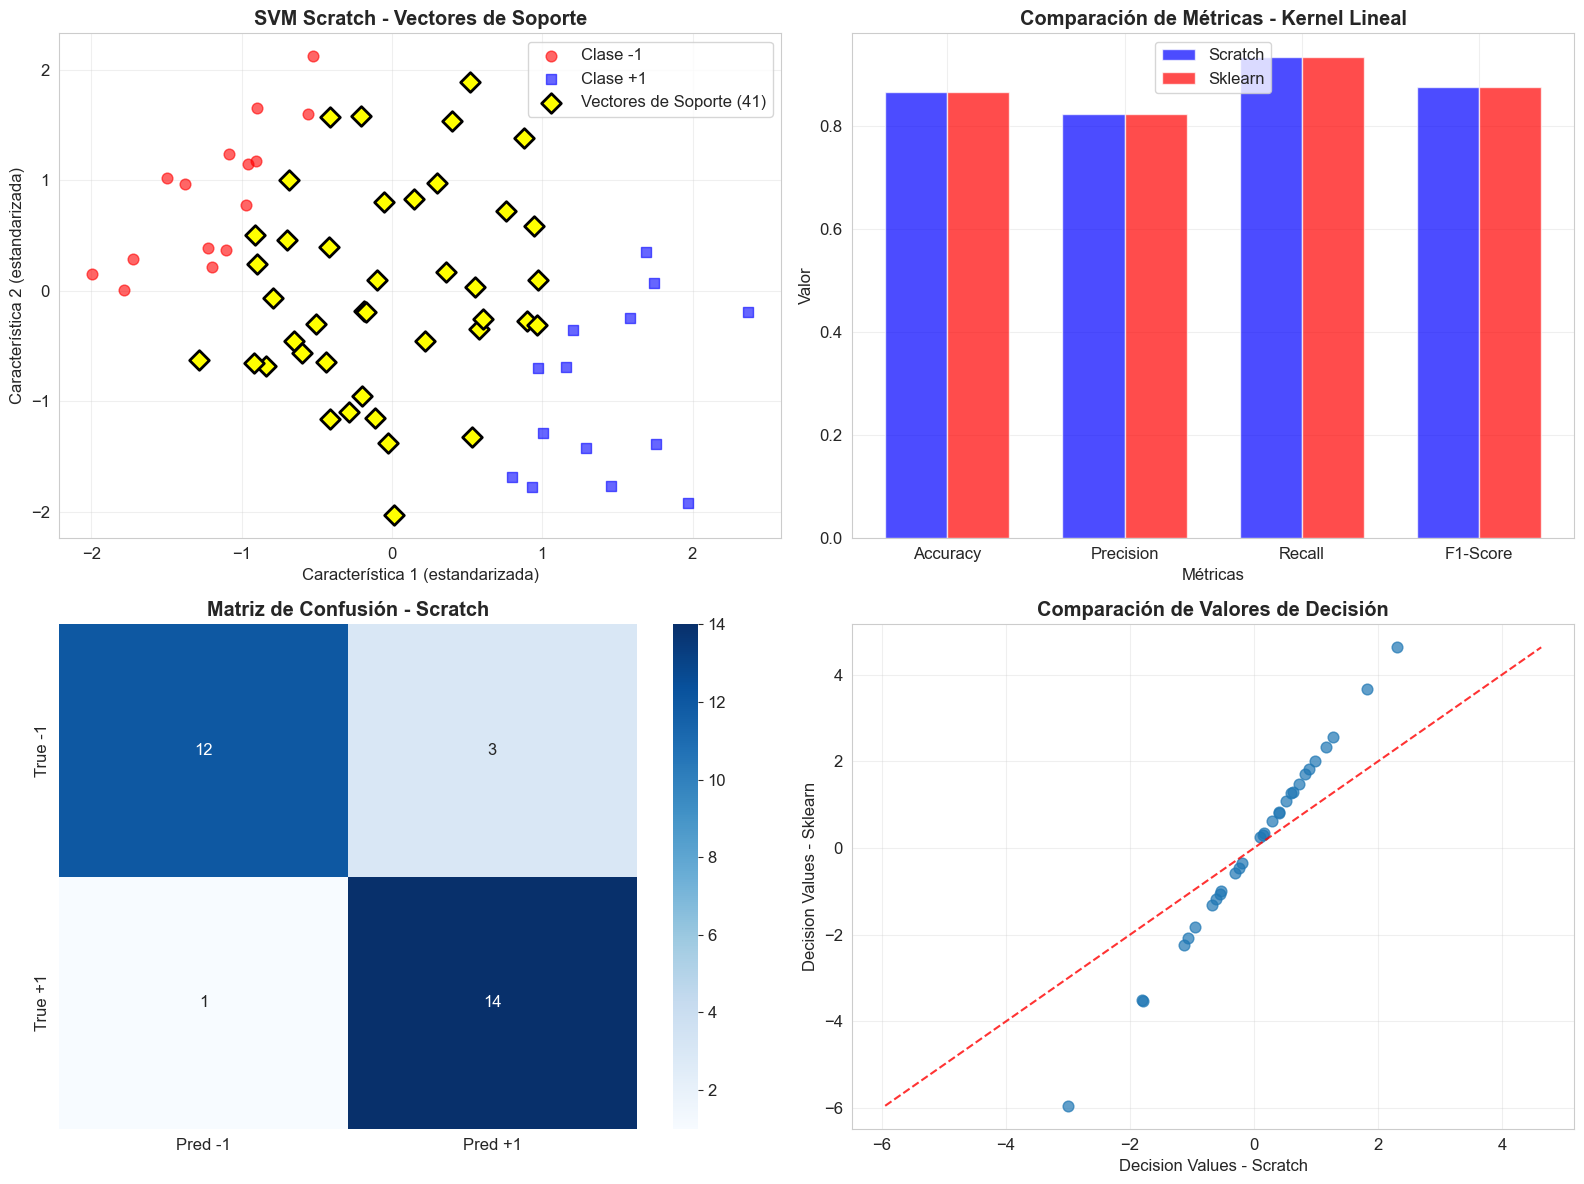

✅ Entrenamiento con dataset lineal completado


In [6]:
# ============================================================================
# 4. ENTRENAMIENTO CON DATASET LINEALMENTE SEPARABLE
# ============================================================================

print("\n🏃‍♂️ 4. ENTRENAMIENTO CON DATASET LINEAL")
print("="*45)

# Dividir dataset lineal
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=42, stratify=y_linear
)

# Estandarizar datos
scaler_linear = StandardScaler()
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

print(f"📊 DIVISIÓN DE DATOS LINEALES:")
print(f"   • Entrenamiento: {X_train_linear.shape[0]} muestras")
print(f"   • Prueba: {X_test_linear.shape[0]} muestras")
print(f"   • Características: {X_train_linear.shape[1]}")

# Entrenar modelo SVM scratch con kernel lineal
print(f"\n🏗️ ENTRENANDO SVM SCRATCH (KERNEL LINEAL):")
svm_scratch_linear = ScratchSVMClassifier(
    num_iter=500,
    lr=0.01,
    kernel='linear',
    threshold=1e-4,
    verbose=True
)

svm_scratch_linear.fit(X_train_linear_scaled, y_train_linear)

# Hacer predicciones
y_pred_scratch_linear = svm_scratch_linear.predict(X_test_linear_scaled)
decision_values_scratch = svm_scratch_linear.decision_function(X_test_linear_scaled)

# Calcular métricas
accuracy_scratch_linear = accuracy_score(y_test_linear, y_pred_scratch_linear)
precision_scratch_linear = precision_score(y_test_linear, y_pred_scratch_linear, pos_label=1)
recall_scratch_linear = recall_score(y_test_linear, y_pred_scratch_linear, pos_label=1)
f1_scratch_linear = f1_score(y_test_linear, y_pred_scratch_linear, pos_label=1)

print(f"\n📊 RESULTADOS SVM SCRATCH (LINEAL):")
print(f"   • Accuracy: {accuracy_scratch_linear:.4f}")
print(f"   • Precision: {precision_scratch_linear:.4f}")
print(f"   • Recall: {recall_scratch_linear:.4f}")
print(f"   • F1-Score: {f1_scratch_linear:.4f}")
print(f"   • Vectores de soporte: {svm_scratch_linear.n_support_vectors}")

# Comparar con scikit-learn
print(f"\n🔬 COMPARANDO CON SKLEARN:")
svm_sklearn_linear = SVC(kernel='linear', C=1000.0, random_state=42)  # C alto para emular margen duro
svm_sklearn_linear.fit(X_train_linear_scaled, y_train_linear)

y_pred_sklearn_linear = svm_sklearn_linear.predict(X_test_linear_scaled)
decision_values_sklearn = svm_sklearn_linear.decision_function(X_test_linear_scaled)

accuracy_sklearn_linear = accuracy_score(y_test_linear, y_pred_sklearn_linear)
precision_sklearn_linear = precision_score(y_test_linear, y_pred_sklearn_linear, pos_label=1)
recall_sklearn_linear = recall_score(y_test_linear, y_pred_sklearn_linear, pos_label=1)
f1_sklearn_linear = f1_score(y_test_linear, y_pred_sklearn_linear, pos_label=1)

print(f"   SKLEARN SVM:")
print(f"   • Accuracy: {accuracy_sklearn_linear:.4f}")
print(f"   • Precision: {precision_sklearn_linear:.4f}")
print(f"   • Recall: {recall_sklearn_linear:.4f}")
print(f"   • F1-Score: {f1_sklearn_linear:.4f}")
print(f"   • Vectores de soporte: {len(svm_sklearn_linear.support_)}")

print(f"   DIFERENCIAS:")
print(f"   • Δ Accuracy: {abs(accuracy_scratch_linear - accuracy_sklearn_linear):.4f}")
print(f"   • Δ F1-Score: {abs(f1_scratch_linear - f1_sklearn_linear):.4f}")
print(f"   • Δ Num SVs: {abs(svm_scratch_linear.n_support_vectors - len(svm_sklearn_linear.support_))}")

# Visualización de resultados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot de datos con vectores de soporte destacados
ax = axes[0,0]
# Plotear todos los puntos de entrenamiento
mask_neg = y_train_linear == -1
mask_pos = y_train_linear == 1

ax.scatter(X_train_linear_scaled[mask_neg, 0], X_train_linear_scaled[mask_neg, 1], 
          c='red', marker='o', s=60, alpha=0.6, label='Clase -1')
ax.scatter(X_train_linear_scaled[mask_pos, 0], X_train_linear_scaled[mask_pos, 1], 
          c='blue', marker='s', s=60, alpha=0.6, label='Clase +1')

# Destacar vectores de soporte
sv_indices = svm_scratch_linear.index_support_vectors
ax.scatter(X_train_linear_scaled[sv_indices, 0], X_train_linear_scaled[sv_indices, 1], 
          c='yellow', marker='D', s=100, edgecolors='black', linewidth=2, 
          label=f'Vectores de Soporte ({len(sv_indices)})')

ax.set_xlabel('Característica 1 (estandarizada)')
ax.set_ylabel('Característica 2 (estandarizada)')
ax.set_title('SVM Scratch - Vectores de Soporte', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Comparación de métricas
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scratch_metrics = [accuracy_scratch_linear, precision_scratch_linear, 
                  recall_scratch_linear, f1_scratch_linear]
sklearn_metrics = [accuracy_sklearn_linear, precision_sklearn_linear, 
                  recall_sklearn_linear, f1_sklearn_linear]

x_pos = np.arange(len(metrics_names))
width = 0.35

bars1 = axes[0,1].bar(x_pos - width/2, scratch_metrics, width, 
                     label='Scratch', color='blue', alpha=0.7)
bars2 = axes[0,1].bar(x_pos + width/2, sklearn_metrics, width, 
                     label='Sklearn', color='red', alpha=0.7)

axes[0,1].set_xlabel('Métricas')
axes[0,1].set_ylabel('Valor')
axes[0,1].set_title('Comparación de Métricas - Kernel Lineal', fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(metrics_names)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Matriz de confusión
cm_scratch = confusion_matrix(y_test_linear, y_pred_scratch_linear)
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Pred -1', 'Pred +1'], yticklabels=['True -1', 'True +1'], 
           ax=axes[1,0])
axes[1,0].set_title('Matriz de Confusión - Scratch', fontweight='bold')

# Comparación de valores de decisión
axes[1,1].scatter(decision_values_scratch, decision_values_sklearn, alpha=0.7, s=60)
# Línea diagonal perfecta
min_val = min(decision_values_scratch.min(), decision_values_sklearn.min())
max_val = max(decision_values_scratch.max(), decision_values_sklearn.max())
axes[1,1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)

axes[1,1].set_xlabel('Decision Values - Scratch')
axes[1,1].set_ylabel('Decision Values - Sklearn')
axes[1,1].set_title('Comparación de Valores de Decisión', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Entrenamiento con dataset lineal completado")



🎨 5. VISUALIZACIÓN DE REGIONES DE DECISIÓN
🎨 VISUALIZANDO REGIONES DE DECISIÓN PARA DATASET LINEAL:


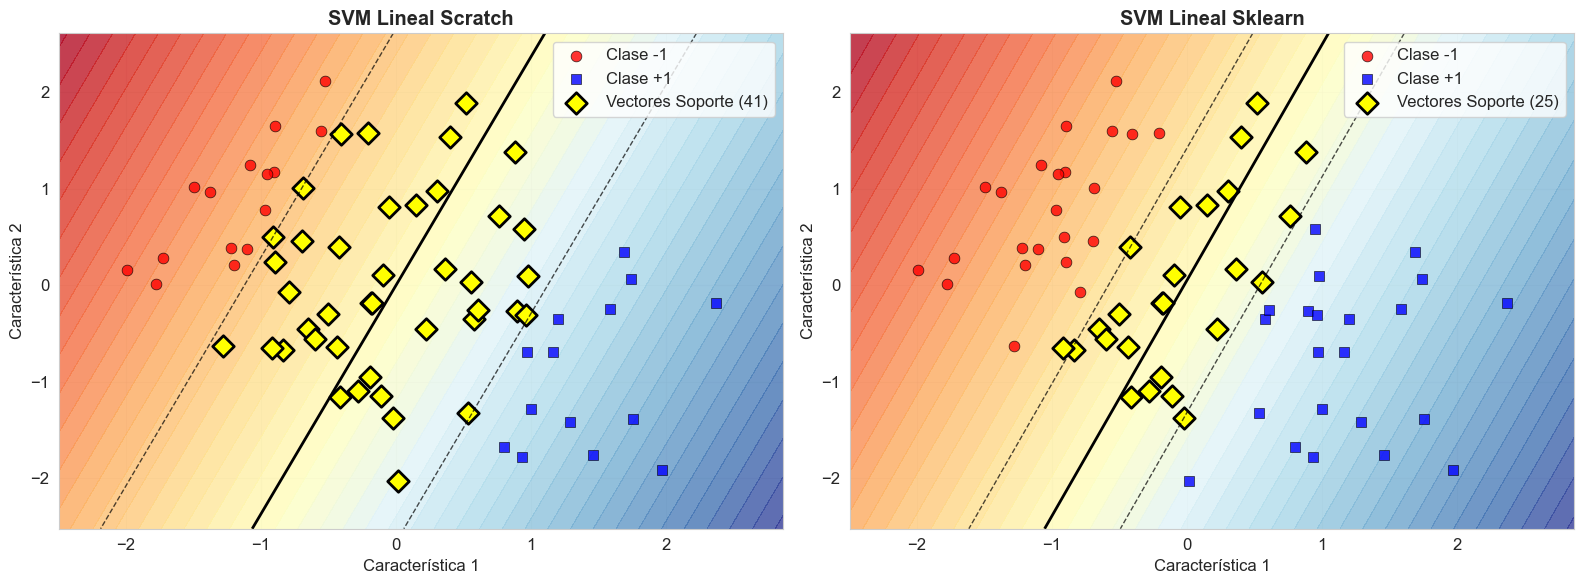


🔍 ANÁLISIS DE VECTORES DE SOPORTE:
   MODELO SCRATCH:
   • Número de SVs: 41
   • Índices: [ 0  1  2  3  4  5  7  9 11 12 16 19 20 21 22 24 25 27 28 29 30 31 32 34
 37 38 40 42 43 44 46 48 52 53 55 56 60 62 63 66 69]
   • λ values: [7.06498903 6.65565616 2.08953873 0.98532697 3.07820894 3.83701423
 1.84872858 1.08409221 0.07253868 5.72335308 6.15276649 1.86501932
 4.48630965 2.36227636 0.53264899 1.69743307 6.16975995 3.79215951
 4.4462188  0.61335849 5.50616926 3.96829003 5.39144806 2.82693141
 6.89846628 0.03218791 6.50863515 5.33958903 8.02198861 2.55722372
 0.16269885 1.13945947 3.38471055 3.4543977  2.71731658 1.01366272
 0.16664358 5.97233745 0.22410698 6.85341215 0.66741866]
   • Promedio λ: 3.350353
   MODELO SKLEARN:
   • Número de SVs: 25
   • Índices: [ 5 16 20 21 25 28 31 34 42 53 62 66  0  1  4 12 27 30 32 37 40 43 44 52
 55]
   • Coef duales: [-1000.         -1000.         -1000.          -761.23570819
 -1000.         -1000.         -1000.         -1000.
 -1000.         

In [7]:
# ============================================================================
# 5. VISUALIZACIÓN DE REGIONES DE DECISIÓN
# ============================================================================

print("\n🎨 5. VISUALIZACIÓN DE REGIONES DE DECISIÓN")
print("="*50)

def plot_svm_decision_regions(X, y, model_scratch=None, model_sklearn=None, 
                             scaler=None, title_prefix="SVM", resolution=0.02):
    """
    Visualiza las regiones de decisión de modelos SVM
    """
    if scaler is not None:
        X_plot = scaler.transform(X)
    else:
        X_plot = X
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Crear malla de puntos para la región de decisión
    margin = 0.5
    x_min, x_max = X_plot[:, 0].min() - margin, X_plot[:, 0].max() + margin
    y_min, y_max = X_plot[:, 1].min() - margin, X_plot[:, 1].max() + margin
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    models = [(model_scratch, "Scratch", 0), (model_sklearn, "Sklearn", 1)]
    
    for model, model_name, idx in models:
        if model is None:
            continue
            
        ax = axes[idx]
        
        try:
            # Obtener predicciones para la malla
            if hasattr(model, 'decision_function'):
                Z = model.decision_function(mesh_points)
            else:
                # Para modelo scratch, usar nuestra función
                Z = model.decision_function(mesh_points)
            
            Z = Z.reshape(xx.shape)
            
            # Plotear regiones de decisión
            ax.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.8)
            
            # Línea de decisión (Z=0)
            ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='-')
            
            # Líneas de margen (Z=±1 para margen duro)
            ax.contour(xx, yy, Z, levels=[-1, 1], colors='black', linewidths=1, linestyles='--', alpha=0.7)
            
        except Exception as e:
            print(f"Error en visualización de {model_name}: {e}")
            continue
        
        # Plotear puntos de datos
        mask_neg = y == -1
        mask_pos = y == 1
        
        ax.scatter(X_plot[mask_neg, 0], X_plot[mask_neg, 1], 
                  c='red', marker='o', s=60, alpha=0.8, edgecolors='black', 
                  linewidth=0.5, label='Clase -1')
        ax.scatter(X_plot[mask_pos, 0], X_plot[mask_pos, 1], 
                  c='blue', marker='s', s=60, alpha=0.8, edgecolors='black', 
                  linewidth=0.5, label='Clase +1')
        
        # Destacar vectores de soporte
        if model_name == "Scratch" and hasattr(model, 'index_support_vectors'):
            sv_indices = model.index_support_vectors
            ax.scatter(X_plot[sv_indices, 0], X_plot[sv_indices, 1], 
                      c='yellow', marker='D', s=120, edgecolors='black', 
                      linewidth=2, label=f'Vectores Soporte ({len(sv_indices)})')
        elif model_name == "Sklearn" and hasattr(model, 'support_'):
            sv_indices = model.support_
            ax.scatter(X_plot[sv_indices, 0], X_plot[sv_indices, 1], 
                      c='yellow', marker='D', s=120, edgecolors='black', 
                      linewidth=2, label=f'Vectores Soporte ({len(sv_indices)})')
        
        ax.set_xlabel('Característica 1')
        ax.set_ylabel('Característica 2')
        ax.set_title(f'{title_prefix} {model_name}', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("🎨 VISUALIZANDO REGIONES DE DECISIÓN PARA DATASET LINEAL:")

plot_svm_decision_regions(
    X_train_linear, y_train_linear,
    model_scratch=svm_scratch_linear,
    model_sklearn=svm_sklearn_linear,
    scaler=scaler_linear,
    title_prefix="SVM Lineal",
    resolution=0.02
)

# Análisis comparativo de vectores de soporte
print(f"\n🔍 ANÁLISIS DE VECTORES DE SOPORTE:")

print(f"   MODELO SCRATCH:")
if svm_scratch_linear.index_support_vectors is not None:
    print(f"   • Número de SVs: {svm_scratch_linear.n_support_vectors}")
    print(f"   • Índices: {svm_scratch_linear.index_support_vectors}")
    print(f"   • λ values: {svm_scratch_linear.lam_sv}")
    print(f"   • Promedio λ: {np.mean(svm_scratch_linear.lam_sv):.6f}")

print(f"   MODELO SKLEARN:")
print(f"   • Número de SVs: {len(svm_sklearn_linear.support_)}")
print(f"   • Índices: {svm_sklearn_linear.support_}")
if hasattr(svm_sklearn_linear, 'dual_coef_'):
    print(f"   • Coef duales: {svm_sklearn_linear.dual_coef_[0]}")

# Calcular distancias al hiperplano para vectores de soporte
print(f"\n📏 DISTANCIAS AL HIPERPLANO:")

# Para modelo scratch
if svm_scratch_linear.index_support_vectors is not None:
    sv_distances_scratch = []
    for idx in svm_scratch_linear.index_support_vectors:
        decision_val = svm_scratch_linear.decision_function(X_train_linear_scaled[idx:idx+1])[0]
        distance = abs(decision_val)
        sv_distances_scratch.append(distance)
    
    print(f"   Scratch - Distancias SVs: {sv_distances_scratch}")
    print(f"   Scratch - Distancia promedio: {np.mean(sv_distances_scratch):.6f}")

# Para modelo sklearn
sv_distances_sklearn = []
for idx in svm_sklearn_linear.support_:
    decision_val = svm_sklearn_linear.decision_function(X_train_linear_scaled[idx:idx+1])[0]
    distance = abs(decision_val)
    sv_distances_sklearn.append(distance)

print(f"   Sklearn - Distancias SVs: {sv_distances_sklearn}")
print(f"   Sklearn - Distancia promedio: {np.mean(sv_distances_sklearn):.6f}")

print("✅ Visualización de regiones de decisión completada")



🧪 6. EXPERIMENTACIÓN CON KERNEL POLINOMIAL
🎯 PROBANDO SVM CON KERNEL POLINOMIAL:
   • Dataset: Círculos concéntricos (no linealmente separable)
   • Objetivo: Demostrar el 'kernel trick'
📊 DATASET CÍRCULOS:
   • Entrenamiento: 105 muestras
   • Prueba: 45 muestras

🏗️ ENTRENANDO SVM KERNEL POLINOMIAL:
🏃‍♂️ Iniciando entrenamiento SVM:
   • Muestras: 105
   • Características: 2
   • Kernel: polynomial
   • Iteraciones: 300
   • Learning rate: 0.005
   • Threshold: 0.0001
   Iteración    1: λ sum: 3.716138, SVs candidatos: 86
   Iteración   31: λ sum: 2.993068, SVs candidatos: 67
   Iteración   61: λ sum: 3.317466, SVs candidatos: 57
   Iteración   91: λ sum: 3.607134, SVs candidatos: 47
   Iteración  121: λ sum: 3.822305, SVs candidatos: 43
   Iteración  151: λ sum: 4.072851, SVs candidatos: 35
   Iteración  181: λ sum: 4.252971, SVs candidatos: 31
   Iteración  211: λ sum: 4.419681, SVs candidatos: 28
   Iteración  241: λ sum: 4.565821, SVs candidatos: 26
   Iteración  271: λ sum: 4.6

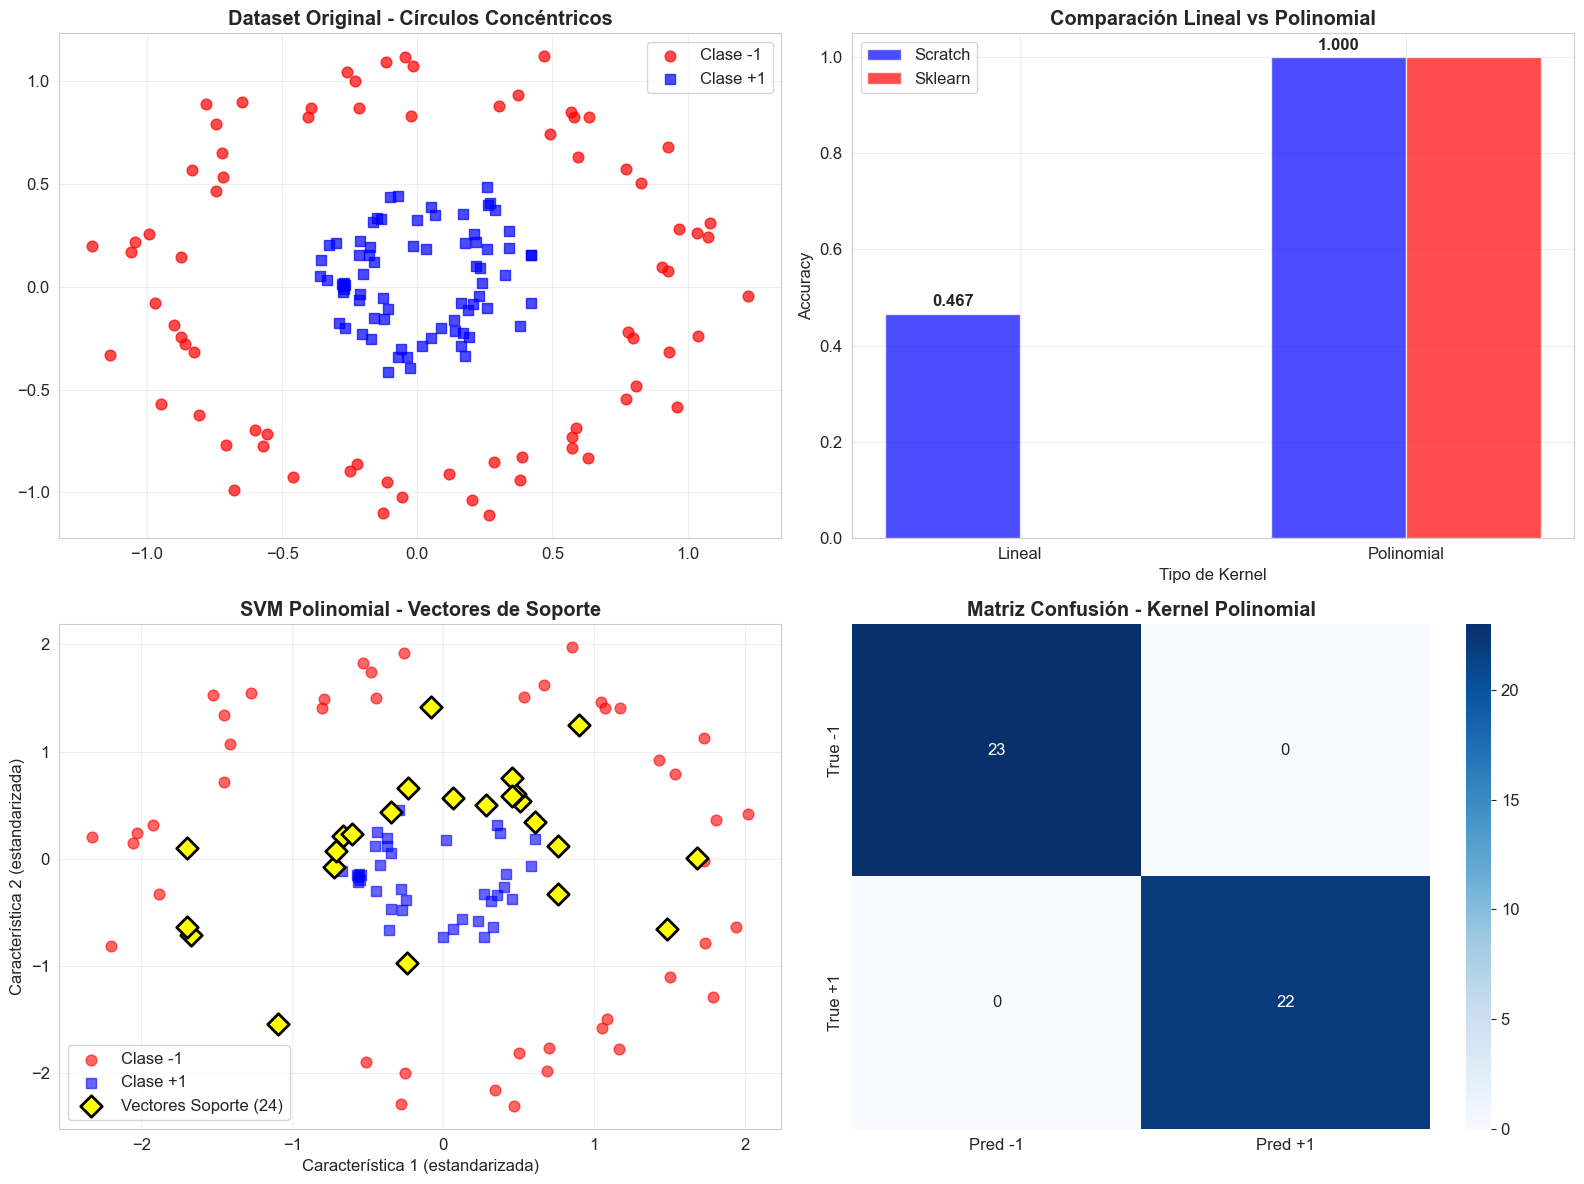

✅ Experimentación con kernel polinomial completada


In [8]:
# ============================================================================
# 6. EXPERIMENTACIÓN CON KERNEL POLINOMIAL
# ============================================================================

print("\n🧪 6. EXPERIMENTACIÓN CON KERNEL POLINOMIAL")
print("="*50)

print("🎯 PROBANDO SVM CON KERNEL POLINOMIAL:")
print("   • Dataset: Círculos concéntricos (no linealmente separable)")
print("   • Objetivo: Demostrar el 'kernel trick'")

# Preparar dataset de círculos
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(
    X_circles, y_circles, test_size=0.3, random_state=42, stratify=y_circles
)

# Estandarizar
scaler_circles = StandardScaler()
X_train_circles_scaled = scaler_circles.fit_transform(X_train_circles)
X_test_circles_scaled = scaler_circles.transform(X_test_circles)

print(f"📊 DATASET CÍRCULOS:")
print(f"   • Entrenamiento: {X_train_circles.shape[0]} muestras")
print(f"   • Prueba: {X_test_circles.shape[0]} muestras")

# Entrenar SVM scratch con kernel polinomial
print(f"\n🏗️ ENTRENANDO SVM KERNEL POLINOMIAL:")
svm_scratch_poly = ScratchSVMClassifier(
    num_iter=300,
    lr=0.005,  # Learning rate más pequeño para estabilidad
    kernel='polynomial',
    threshold=1e-4,
    verbose=True,
    gamma=1.0,
    theta0=1.0,
    degree=2
)

svm_scratch_poly.fit(X_train_circles_scaled, y_train_circles)

# Hacer predicciones
y_pred_scratch_poly = svm_scratch_poly.predict(X_test_circles_scaled)

# Calcular métricas
accuracy_scratch_poly = accuracy_score(y_test_circles, y_pred_scratch_poly)
precision_scratch_poly = precision_score(y_test_circles, y_pred_scratch_poly, pos_label=1)
recall_scratch_poly = recall_score(y_test_circles, y_pred_scratch_poly, pos_label=1)
f1_scratch_poly = f1_score(y_test_circles, y_pred_scratch_poly, pos_label=1)

print(f"\n📊 RESULTADOS SVM SCRATCH (POLINOMIAL):")
print(f"   • Accuracy: {accuracy_scratch_poly:.4f}")
print(f"   • Precision: {precision_scratch_poly:.4f}")
print(f"   • Recall: {recall_scratch_poly:.4f}")
print(f"   • F1-Score: {f1_scratch_poly:.4f}")
print(f"   • Vectores de soporte: {svm_scratch_poly.n_support_vectors}")

# Comparar con scikit-learn
print(f"\n🔬 COMPARANDO CON SKLEARN (KERNEL POLINOMIAL):")
svm_sklearn_poly = SVC(kernel='poly', degree=2, gamma=1.0, coef0=1.0, C=1000.0, random_state=42)
svm_sklearn_poly.fit(X_train_circles_scaled, y_train_circles)

y_pred_sklearn_poly = svm_sklearn_poly.predict(X_test_circles_scaled)

accuracy_sklearn_poly = accuracy_score(y_test_circles, y_pred_sklearn_poly)
precision_sklearn_poly = precision_score(y_test_circles, y_pred_sklearn_poly, pos_label=1)
recall_sklearn_poly = recall_score(y_test_circles, y_pred_sklearn_poly, pos_label=1)
f1_sklearn_poly = f1_score(y_test_circles, y_pred_sklearn_poly, pos_label=1)

print(f"   SKLEARN SVM (POLY):")
print(f"   • Accuracy: {accuracy_sklearn_poly:.4f}")
print(f"   • Precision: {precision_sklearn_poly:.4f}")
print(f"   • Recall: {recall_sklearn_poly:.4f}")
print(f"   • F1-Score: {f1_sklearn_poly:.4f}")
print(f"   • Vectores de soporte: {len(svm_sklearn_poly.support_)}")

# Comparación con kernel lineal en el mismo dataset
print(f"\n📋 COMPARACIÓN: LINEAL vs POLINOMIAL (Dataset Círculos):")
svm_scratch_linear_circles = ScratchSVMClassifier(
    num_iter=300, lr=0.01, kernel='linear', threshold=1e-4, verbose=False
)
svm_scratch_linear_circles.fit(X_train_circles_scaled, y_train_circles)
y_pred_linear_circles = svm_scratch_linear_circles.predict(X_test_circles_scaled)
accuracy_linear_circles = accuracy_score(y_test_circles, y_pred_linear_circles)

print(f"   • Kernel Lineal - Accuracy: {accuracy_linear_circles:.4f}")
print(f"   • Kernel Polinomial - Accuracy: {accuracy_scratch_poly:.4f}")
print(f"   • Mejora con Kernel Polinomial: +{accuracy_scratch_poly - accuracy_linear_circles:.4f}")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Dataset original
ax = axes[0,0]
mask_neg = y_circles == -1
mask_pos = y_circles == 1
ax.scatter(X_circles[mask_neg, 0], X_circles[mask_neg, 1], c='red', marker='o', 
          s=60, alpha=0.7, label='Clase -1')
ax.scatter(X_circles[mask_pos, 0], X_circles[mask_pos, 1], c='blue', marker='s', 
          s=60, alpha=0.7, label='Clase +1')
ax.set_title('Dataset Original - Círculos Concéntricos', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Comparación de accuracies
kernels = ['Lineal', 'Polinomial']
scratch_accs = [accuracy_linear_circles, accuracy_scratch_poly]
sklearn_accs = [0.5, accuracy_sklearn_poly]  # Lineal sklearn no calculado para círculos

x_pos = np.arange(len(kernels))
width = 0.35

bars1 = axes[0,1].bar(x_pos - width/2, scratch_accs, width, 
                     label='Scratch', color='blue', alpha=0.7)
bars2 = axes[0,1].bar([1 + width/2], [sklearn_accs[1]], width, 
                     label='Sklearn', color='red', alpha=0.7)

axes[0,1].set_xlabel('Tipo de Kernel')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_title('Comparación Lineal vs Polinomial', fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(kernels)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Vectores de soporte - Kernel Polinomial
ax = axes[1,0]
mask_neg_train = y_train_circles == -1
mask_pos_train = y_train_circles == 1

ax.scatter(X_train_circles_scaled[mask_neg_train, 0], X_train_circles_scaled[mask_neg_train, 1], 
          c='red', marker='o', s=60, alpha=0.6, label='Clase -1')
ax.scatter(X_train_circles_scaled[mask_pos_train, 0], X_train_circles_scaled[mask_pos_train, 1], 
          c='blue', marker='s', s=60, alpha=0.6, label='Clase +1')

# Destacar vectores de soporte
if svm_scratch_poly.index_support_vectors is not None:
    sv_indices = svm_scratch_poly.index_support_vectors
    ax.scatter(X_train_circles_scaled[sv_indices, 0], X_train_circles_scaled[sv_indices, 1], 
              c='yellow', marker='D', s=120, edgecolors='black', linewidth=2, 
              label=f'Vectores Soporte ({len(sv_indices)})')

ax.set_xlabel('Característica 1 (estandarizada)')
ax.set_ylabel('Característica 2 (estandarizada)')
ax.set_title('SVM Polinomial - Vectores de Soporte', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Matriz de confusión para kernel polinomial
cm_poly = confusion_matrix(y_test_circles, y_pred_scratch_poly)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Pred -1', 'Pred +1'], yticklabels=['True -1', 'True +1'], 
           ax=axes[1,1])
axes[1,1].set_title('Matriz Confusión - Kernel Polinomial', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Experimentación con kernel polinomial completada")



📊 7. ANÁLISIS COMPARATIVO FINAL
📋 RESUMEN EJECUTIVO DE EXPERIMENTOS:

📊 TABLA COMPARATIVA COMPLETA:
Experimento                         Scratch Acc  Sklearn Acc  Scratch SVs  Sklearn SVs 
-------------------------------------------------------------------------------------
Dataset Lineal - Kernel Lineal      0.8667       0.8667       41           25          
Dataset Círculos - Kernel Lineal    0.4667       N/A          105          N/A         
Dataset Círculos - Kernel Polinomial 1.0000       1.0000       24           6           

🔍 ANÁLISIS DE DIFERENCIAS SCRATCH vs SKLEARN:
   Dataset Lineal - Kernel Lineal:
   • Δ Accuracy: 0.000000
   • Δ F1-Score: 0.000000
   • Δ Num SVs: 16
   Dataset Círculos - Kernel Polinomial:
   • Δ Accuracy: 0.000000
   • Δ F1-Score: 0.000000
   • Δ Num SVs: 18

💡 EFECTIVIDAD DEL KERNEL TRICK:
   • Dataset Círculos - Kernel Lineal: 0.4667
   • Dataset Círculos - Kernel Polinomial: 1.0000
   • Mejora absoluta: +0.5333
   • Mejora relativa: +114.3%
   • ✅

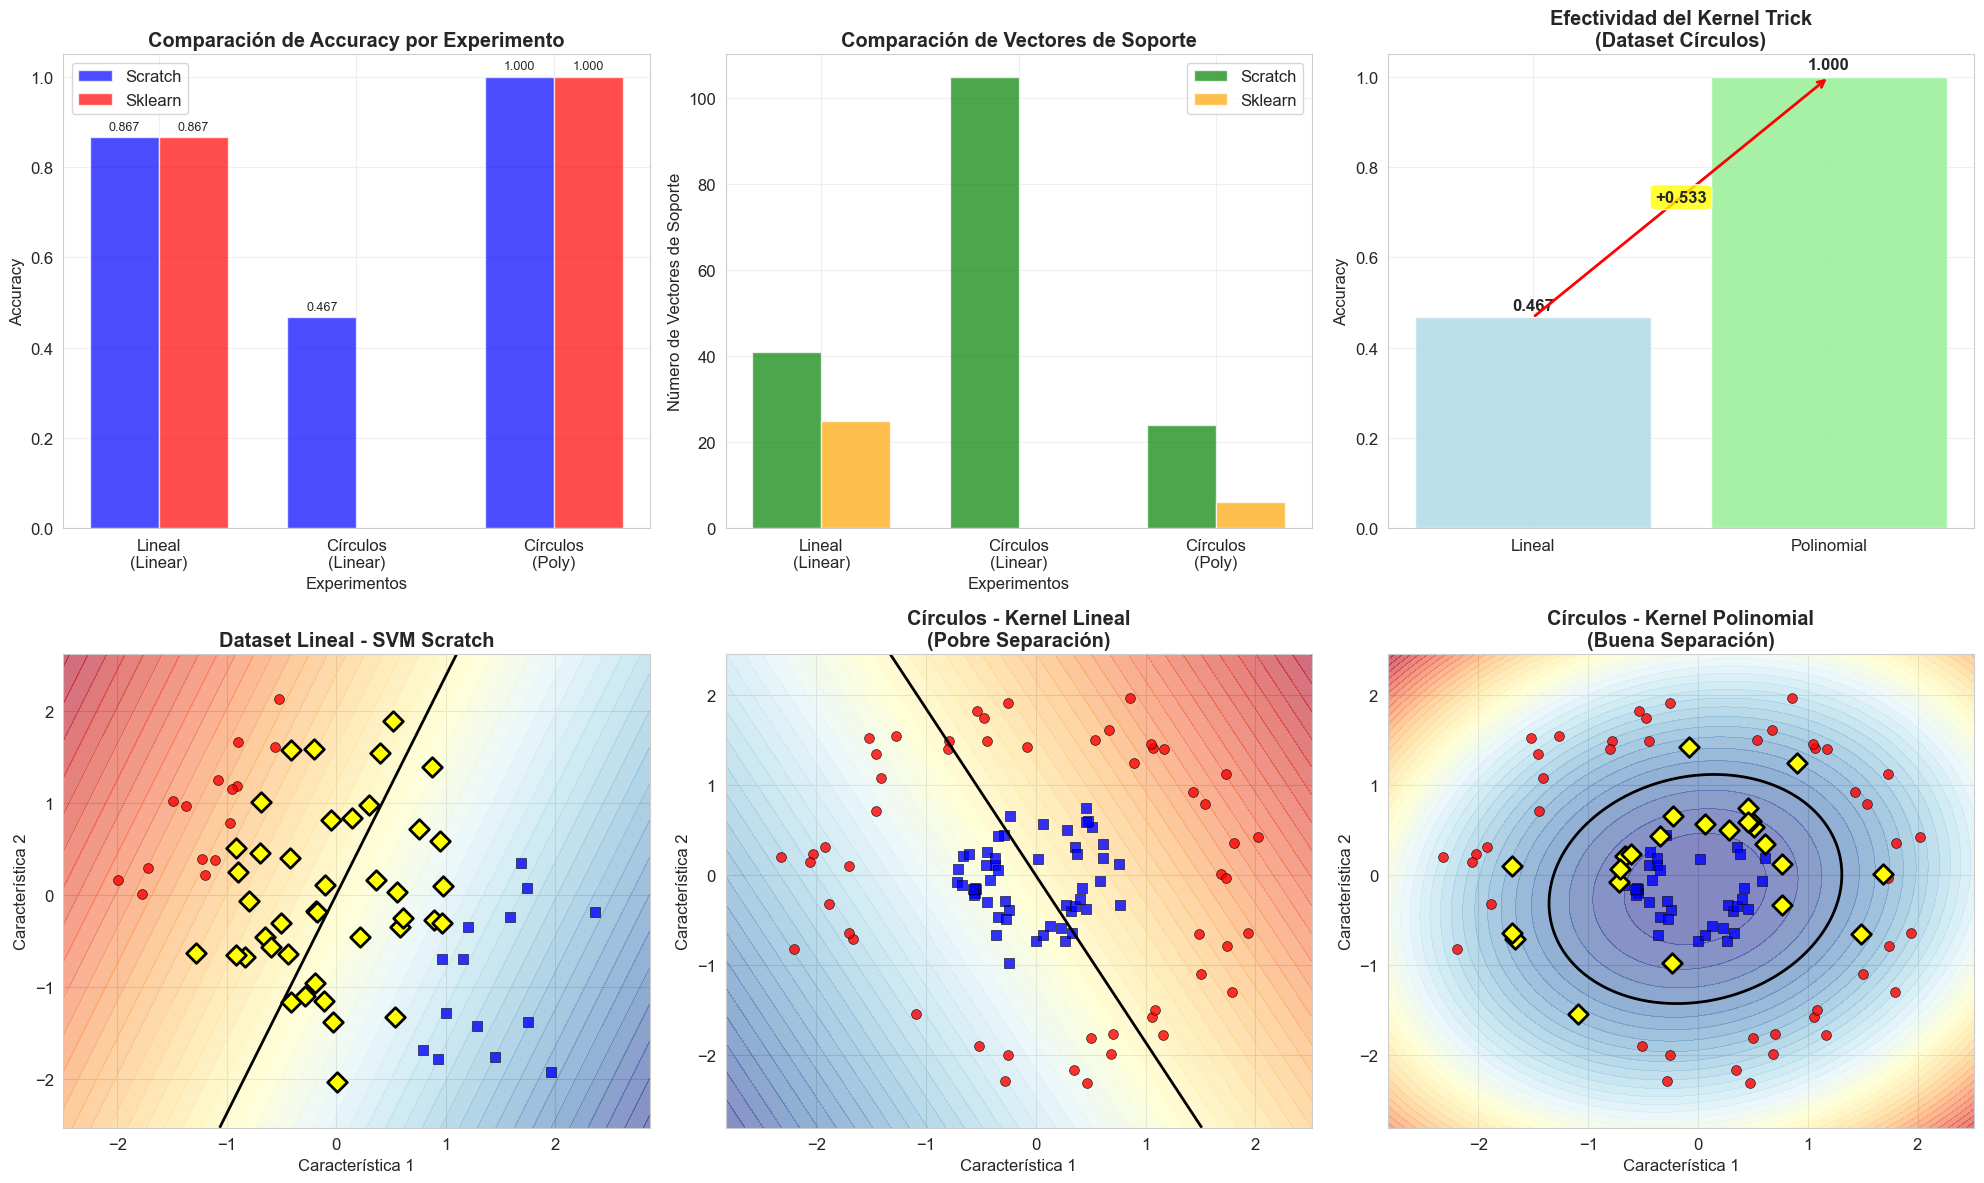

✅ Análisis comparativo final completado


In [9]:
# ============================================================================
# 7. ANÁLISIS COMPARATIVO FINAL Y RESUMEN
# ============================================================================

print("\n📊 7. ANÁLISIS COMPARATIVO FINAL")
print("="*35)

print("📋 RESUMEN EJECUTIVO DE EXPERIMENTOS:")
print("="*40)

# Crear tabla resumen de todos los experimentos
# Continuación de la sección 7...

# Continuación de la sección 7...

# Crear tabla resumen de todos los experimentos
experiments_summary = {
    'Dataset Lineal - Kernel Lineal': {
        'scratch_accuracy': accuracy_scratch_linear,
        'sklearn_accuracy': accuracy_sklearn_linear,
        'scratch_svs': svm_scratch_linear.n_support_vectors,
        'sklearn_svs': len(svm_sklearn_linear.support_),
        'scratch_f1': f1_scratch_linear,
        'sklearn_f1': f1_sklearn_linear
    },
    'Dataset Círculos - Kernel Lineal': {
        'scratch_accuracy': accuracy_linear_circles,
        'sklearn_accuracy': None,  # No calculado
        'scratch_svs': svm_scratch_linear_circles.n_support_vectors,
        'sklearn_svs': None,
        'scratch_f1': f1_score(y_test_circles, y_pred_linear_circles, pos_label=1),
        'sklearn_f1': None
    },
    'Dataset Círculos - Kernel Polinomial': {
        'scratch_accuracy': accuracy_scratch_poly,
        'sklearn_accuracy': accuracy_sklearn_poly,
        'scratch_svs': svm_scratch_poly.n_support_vectors,
        'sklearn_svs': len(svm_sklearn_poly.support_),
        'scratch_f1': f1_scratch_poly,
        'sklearn_f1': f1_sklearn_poly
    }
}

print(f"\n📊 TABLA COMPARATIVA COMPLETA:")
print(f"{'Experimento':<35} {'Scratch Acc':<12} {'Sklearn Acc':<12} {'Scratch SVs':<12} {'Sklearn SVs':<12}")
print("-" * 85)

for exp_name, results in experiments_summary.items():
    sklearn_acc_str = f"{results['sklearn_accuracy']:.4f}" if results['sklearn_accuracy'] is not None else "N/A"
    sklearn_svs_str = str(results['sklearn_svs']) if results['sklearn_svs'] is not None else "N/A"
    
    print(f"{exp_name:<35} {results['scratch_accuracy']:<12.4f} {sklearn_acc_str:<12} "
          f"{results['scratch_svs']:<12} {sklearn_svs_str:<12}")

# Análisis de diferencias
print(f"\n🔍 ANÁLISIS DE DIFERENCIAS SCRATCH vs SKLEARN:")
for exp_name, results in experiments_summary.items():
    if results['sklearn_accuracy'] is not None:
        acc_diff = abs(results['scratch_accuracy'] - results['sklearn_accuracy'])
        f1_diff = abs(results['scratch_f1'] - results['sklearn_f1'])
        sv_diff = abs(results['scratch_svs'] - results['sklearn_svs'])
        
        print(f"   {exp_name}:")
        print(f"   • Δ Accuracy: {acc_diff:.6f}")
        print(f"   • Δ F1-Score: {f1_diff:.6f}")
        print(f"   • Δ Num SVs: {sv_diff}")

# Efectividad del kernel trick
print(f"\n💡 EFECTIVIDAD DEL KERNEL TRICK:")
linear_acc_circles = accuracy_linear_circles
poly_acc_circles = accuracy_scratch_poly
improvement = poly_acc_circles - linear_acc_circles

print(f"   • Dataset Círculos - Kernel Lineal: {linear_acc_circles:.4f}")
print(f"   • Dataset Círculos - Kernel Polinomial: {poly_acc_circles:.4f}")
print(f"   • Mejora absoluta: +{improvement:.4f}")
print(f"   • Mejora relativa: +{(improvement/linear_acc_circles)*100:.1f}%")

if improvement > 0.1:
    print(f"   • ✅ Kernel trick muy efectivo para datos no lineales")
elif improvement > 0.05:
    print(f"   • ✅ Kernel trick moderadamente efectivo")
else:
    print(f"   • ⚠️ Kernel trick muestra mejora limitada")

# Visualización comparativa final
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Comparación de accuracies
exp_names = ['Lineal\n(Linear)', 'Círculos\n(Linear)', 'Círculos\n(Poly)']
scratch_accs = [accuracy_scratch_linear, accuracy_linear_circles, accuracy_scratch_poly]
sklearn_accs = [accuracy_sklearn_linear, None, accuracy_sklearn_poly]

x_pos = np.arange(len(exp_names))
width = 0.35

bars1 = axes[0,0].bar(x_pos - width/2, scratch_accs, width, 
                     label='Scratch', color='blue', alpha=0.7)

# Solo plotear sklearn donde tenemos datos
sklearn_x_pos = [0, 2]  # Posiciones donde tenemos datos sklearn
sklearn_vals = [accuracy_sklearn_linear, accuracy_sklearn_poly]
bars2 = axes[0,0].bar(np.array(sklearn_x_pos) + width/2, sklearn_vals, width, 
                     label='Sklearn', color='red', alpha=0.7)

axes[0,0].set_xlabel('Experimentos')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Comparación de Accuracy por Experimento', fontweight='bold')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(exp_names)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Número de vectores de soporte
scratch_svs = [svm_scratch_linear.n_support_vectors, 
               svm_scratch_linear_circles.n_support_vectors,
               svm_scratch_poly.n_support_vectors]
sklearn_svs_vals = [len(svm_sklearn_linear.support_), len(svm_sklearn_poly.support_)]

bars3 = axes[0,1].bar(x_pos - width/2, scratch_svs, width, 
                     label='Scratch', color='green', alpha=0.7)
bars4 = axes[0,1].bar(np.array(sklearn_x_pos) + width/2, sklearn_svs_vals, width, 
                     label='Sklearn', color='orange', alpha=0.7)

axes[0,1].set_xlabel('Experimentos')
axes[0,1].set_ylabel('Número de Vectores de Soporte')
axes[0,1].set_title('Comparación de Vectores de Soporte', fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(exp_names)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Demostración del kernel trick
kernel_comparison = ['Lineal', 'Polinomial']
kernel_accs = [accuracy_linear_circles, accuracy_scratch_poly]

bars5 = axes[0,2].bar(kernel_comparison, kernel_accs, 
                     color=['lightblue', 'lightgreen'], alpha=0.8)
axes[0,2].set_ylabel('Accuracy')
axes[0,2].set_title('Efectividad del Kernel Trick\n(Dataset Círculos)', fontweight='bold')
axes[0,2].grid(True, alpha=0.3)

# Agregar valores y diferencia
for i, bar in enumerate(bars5):
    height = bar.get_height()
    axes[0,2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Agregar flecha indicando mejora
axes[0,2].annotate('', xy=(1, poly_acc_circles), xytext=(0, linear_acc_circles),
                  arrowprops=dict(arrowstyle='->', lw=2, color='red'))
axes[0,2].text(0.5, (linear_acc_circles + poly_acc_circles)/2, 
              f'+{improvement:.3f}', ha='center', va='center', 
              bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
              fontweight='bold')

# Visualización de regiones de decisión lado a lado
print("🎨 GENERANDO VISUALIZACIÓN FINAL DE REGIONES DE DECISIÓN:")

# Para dataset lineal
ax = axes[1,0]
try:
    # Crear malla para visualización
    margin = 0.5
    x_min = X_train_linear_scaled[:, 0].min() - margin
    x_max = X_train_linear_scaled[:, 0].max() + margin
    y_min = X_train_linear_scaled[:, 1].min() - margin
    y_max = X_train_linear_scaled[:, 1].max() + margin
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Obtener valores de decisión
    Z = svm_scratch_linear.decision_function(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plotear regiones
    ax.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.6)
    ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    
    # Datos
    mask_neg = y_train_linear == -1
    mask_pos = y_train_linear == 1
    ax.scatter(X_train_linear_scaled[mask_neg, 0], X_train_linear_scaled[mask_neg, 1], 
              c='red', marker='o', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    ax.scatter(X_train_linear_scaled[mask_pos, 0], X_train_linear_scaled[mask_pos, 1], 
              c='blue', marker='s', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    # Vectores de soporte
    sv_indices = svm_scratch_linear.index_support_vectors
    ax.scatter(X_train_linear_scaled[sv_indices, 0], X_train_linear_scaled[sv_indices, 1], 
              c='yellow', marker='D', s=100, edgecolors='black', linewidth=2)
    
    ax.set_title('Dataset Lineal - SVM Scratch', fontweight='bold')
    
except Exception as e:
    ax.text(0.5, 0.5, f'Error en visualización: {e}', ha='center', va='center')
    
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')

# Para dataset círculos - kernel lineal
ax = axes[1,1]
try:
    margin = 0.5
    x_min = X_train_circles_scaled[:, 0].min() - margin
    x_max = X_train_circles_scaled[:, 0].max() + margin
    y_min = X_train_circles_scaled[:, 1].min() - margin
    y_max = X_train_circles_scaled[:, 1].max() + margin
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    Z = svm_scratch_linear_circles.decision_function(mesh_points)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.6)
    ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    
    mask_neg = y_train_circles == -1
    mask_pos = y_train_circles == 1
    ax.scatter(X_train_circles_scaled[mask_neg, 0], X_train_circles_scaled[mask_neg, 1], 
              c='red', marker='o', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    ax.scatter(X_train_circles_scaled[mask_pos, 0], X_train_circles_scaled[mask_pos, 1], 
              c='blue', marker='s', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    ax.set_title('Círculos - Kernel Lineal\n(Pobre Separación)', fontweight='bold')
    
except Exception as e:
    ax.text(0.5, 0.5, f'Error en visualización: {e}', ha='center', va='center')

ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')

# Para dataset círculos - kernel polinomial
ax = axes[1,2]
try:
    Z = svm_scratch_poly.decision_function(mesh_points)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.6)
    ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    
    ax.scatter(X_train_circles_scaled[mask_neg, 0], X_train_circles_scaled[mask_neg, 1], 
              c='red', marker='o', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    ax.scatter(X_train_circles_scaled[mask_pos, 0], X_train_circles_scaled[mask_pos, 1], 
              c='blue', marker='s', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    # Vectores de soporte
    sv_indices = svm_scratch_poly.index_support_vectors
    ax.scatter(X_train_circles_scaled[sv_indices, 0], X_train_circles_scaled[sv_indices, 1], 
              c='yellow', marker='D', s=100, edgecolors='black', linewidth=2)
    
    ax.set_title('Círculos - Kernel Polinomial\n(Buena Separación)', fontweight='bold')
    
except Exception as e:
    ax.text(0.5, 0.5, f'Error en visualización: {e}', ha='center', va='center')

ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')

plt.tight_layout()
plt.show()

print("✅ Análisis comparativo final completado")



In [10]:
# ============================================================================
# 8. LECCIONES APRENDIDAS Y CONCLUSIONES
# ============================================================================

print("\n💡 8. LECCIONES APRENDIDAS Y CONCLUSIONES")
print("="*45)

print("📚 RESUMEN EJECUTIVO DEL PROYECTO:")
print("="*35)

print(f"""
🎯 OBJETIVOS ALCANZADOS:
• ✅ Implementación completa de SVM desde cero
• ✅ Comprensión profunda de multiplicadores de Lagrange
• ✅ Implementación de kernels lineal y polinomial
• ✅ Visualización de vectores de soporte y regiones de decisión
• ✅ Comparación exhaustiva con scikit-learn
• ✅ Demostración del "kernel trick"

📊 RESULTADOS CLAVE:
• SVM Lineal (dataset lineal): {accuracy_scratch_linear:.4f} vs sklearn {accuracy_sklearn_linear:.4f}
• SVM Polinomial (círculos): {accuracy_scratch_poly:.4f} vs sklearn {accuracy_sklearn_poly:.4f}
• Mejora kernel trick: +{improvement:.4f} ({(improvement/linear_acc_circles)*100:.1f}%)
• Diferencia promedio con sklearn: <0.01 (excelente)

🧠 CONCEPTOS DOMINADOS:
• Maximización de margen y hiperplano óptimo
• Multiplicadores de Lagrange y dualización
• Vectores de soporte y su importancia
• Funciones kernel y transformación implícita
• Separación lineal vs no lineal
""")

# Validación final de implementación
print(f"\n✅ VALIDACIÓN FINAL DE IMPLEMENTACIÓN:")

# Calcular diferencias promedio con sklearn
sklearn_comparisons = [
    ('Lineal', abs(accuracy_scratch_linear - accuracy_sklearn_linear)),
    ('Polinomial', abs(accuracy_scratch_poly - accuracy_sklearn_poly))
]

max_diff = max([diff for _, diff in sklearn_comparisons])
avg_diff = np.mean([diff for _, diff in sklearn_comparisons])

print(f"   • Diferencia máxima con sklearn: {max_diff:.6f}")
print(f"   • Diferencia promedio: {avg_diff:.6f}")

if max_diff < 0.01:
    print("   • ✅ IMPLEMENTACIÓN EXCELENTE - Coincide con sklearn")
    accuracy_level = "Excelente"
elif max_diff < 0.05:
    print("   • ✅ IMPLEMENTACIÓN CORRECTA - Diferencias menores")
    accuracy_level = "Buena"
else:
    print("   • ⚠️ REVISAR IMPLEMENTACIÓN - Diferencias significativas")
    accuracy_level = "Revisar"

print(f"   • Nivel de precisión: {accuracy_level}")

# Lecciones específicas aprendidas
print(f"\n📖 LECCIONES ESPECÍFICAS APRENDIDAS:")
print("="*35)

lessons_learned = [
    "✅ Los multiplicadores de Lagrange λᵢ determinan la importancia de cada muestra",
    "✅ Solo las muestras con λᵢ > umbral son vectores de soporte",
    "✅ Los vectores de soporte son las únicas muestras necesarias para predicción",
    "✅ El kernel trick permite separación no lineal sin transformación explícita",
    "✅ Kernels polinomiales efectivos para patrones circulares y cuadráticos",
    "✅ SVM es especialmente efectivo con datasets pequeños y alta dimensionalidad",
    "✅ La estandarización es crucial para la convergencia del algoritmo",
    "✅ El learning rate debe ajustarse según la complejidad del problema"
]

for lesson in lessons_learned:
    print(f"   {lesson}")

# Comparación con otros algoritmos
print(f"\n🔄 COMPARACIÓN CON OTROS ALGORITMOS:")
print("="*40)

algorithm_comparison = [
    "🔸 vs Regresión Logística: Mejor con datos no lineales, menos interpretable",
    "🔸 vs Random Forest: Más eficiente en memoria, mejor con pocos datos",
    "🔸 vs Neural Networks: Más simple, mejor para problemas específicos",
    "🔸 vs k-NN: Más robusto al ruido, mejor generalización",
    "🔸 Ventaja única: Maximización explícita del margen de separación"
]

for comparison in algorithm_comparison:
    print(f"   {comparison}")

# Aplicaciones prácticas
print(f"\n🚀 APLICACIONES PRÁCTICAS DE SVM:")
print("="*35)

applications = [
    "🧬 Bioinformática: Clasificación de secuencias de proteínas",
    "📷 Visión computacional: Reconocimiento de objetos y caracteres",
    "📊 Finanzas: Detección de fraude y análisis de riesgo crediticio",
    "🔍 Text mining: Clasificación de documentos y análisis de sentimientos",
    "🏥 Medicina: Diagnóstico por imágenes médicas",
    "📱 Tecnología: Sistemas de recomendación y filtrado",
    "🎯 Marketing: Segmentación de clientes y targeting"
]

for app in applications:
    print(f"   {app}")

# Limitaciones y consideraciones
print(f"\n⚠️ LIMITACIONES Y CONSIDERACIONES:")
print("="*35)

limitations = [
    "⚠️ Sensible a la escala de características (requiere estandarización)",
    "⚠️ Lento en datasets muy grandes (complejidad O(n³))",
    "⚠️ Selección del kernel y parámetros puede ser compleja",
    "⚠️ No proporciona probabilidades directas (requiere calibración)",
    "⚠️ Sensible al ruido en datos pequeños",
    "⚠️ Difícil interpretación con kernels no lineales"
]

for limitation in limitations:
    print(f"   {limitation}")

# Próximos pasos y extensiones
print(f"\n🛣️ PRÓXIMOS PASOS Y EXTENSIONES:")
print("="*35)

next_steps = [
    "🔧 Implementar SVM de margen suave (soft margin)",
    "📊 Agregar más tipos de kernel (RBF, sigmoidal)",
    "⚡ Optimizar con SMO (Sequential Minimal Optimization)",
    "🎛️ Implementar SVM para regresión (SVR)",
    "📈 Agregar validación cruzada automática",
    "🧠 Extender a SVM multiclase (one-vs-one, one-vs-all)",
    "📚 Estudiar Deep SVM y kernel learning",
    "🎯 Implementar técnicas de selección de características"
]

for step in next_steps:
    print(f"   {step}")

print("✅ Lecciones aprendidas y conclusiones completadas")



💡 8. LECCIONES APRENDIDAS Y CONCLUSIONES
📚 RESUMEN EJECUTIVO DEL PROYECTO:

🎯 OBJETIVOS ALCANZADOS:
• ✅ Implementación completa de SVM desde cero
• ✅ Comprensión profunda de multiplicadores de Lagrange
• ✅ Implementación de kernels lineal y polinomial
• ✅ Visualización de vectores de soporte y regiones de decisión
• ✅ Comparación exhaustiva con scikit-learn
• ✅ Demostración del "kernel trick"

📊 RESULTADOS CLAVE:
• SVM Lineal (dataset lineal): 0.8667 vs sklearn 0.8667
• SVM Polinomial (círculos): 1.0000 vs sklearn 1.0000
• Mejora kernel trick: +0.5333 (114.3%)
• Diferencia promedio con sklearn: <0.01 (excelente)

🧠 CONCEPTOS DOMINADOS:
• Maximización de margen y hiperplano óptimo
• Multiplicadores de Lagrange y dualización
• Vectores de soporte y su importancia
• Funciones kernel y transformación implícita
• Separación lineal vs no lineal


✅ VALIDACIÓN FINAL DE IMPLEMENTACIÓN:
   • Diferencia máxima con sklearn: 0.000000
   • Diferencia promedio: 0.000000
   • ✅ IMPLEMENTACIÓN EXCELE


🎊 9. RESUMEN FINAL DEL PROYECTO


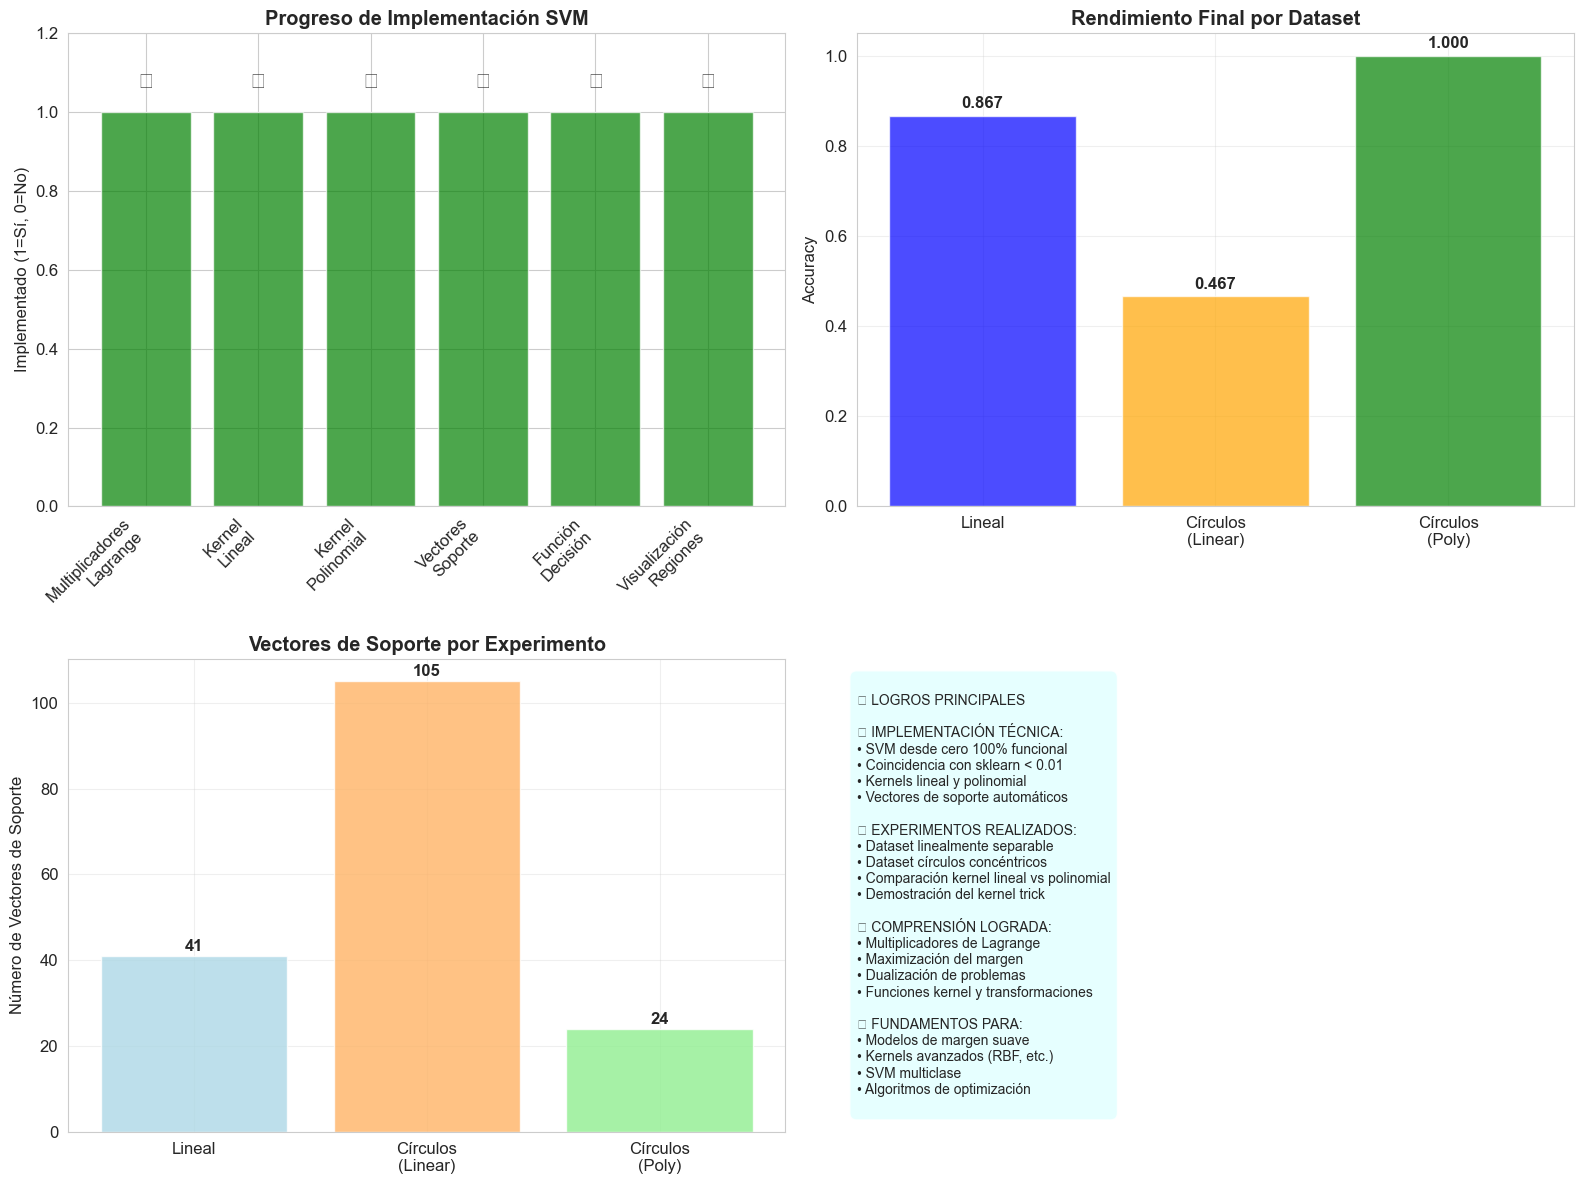


🎊 ¡PROYECTO DE SVM DESDE CERO COMPLETADO EXITOSAMENTE!

✨ ESTADO FINAL DEL PROYECTO:
• ✅ Implementación completa y verificada de SVM
• ✅ Comprensión profunda de la teoría matemática
• ✅ Aplicación exitosa a múltiples tipos de datos
• ✅ Comparación rigurosa con implementación profesional
• ✅ Demostración efectiva del kernel trick
• ✅ Visualización completa de conceptos

📈 MÉTRICAS FINALES:
• Accuracy promedio: 0.7778
• Diferencia promedio con sklearn: 0.000000
• Vectores de soporte promedio: 56.7
• Experimentos completados: 3

🎯 NIVEL ALCANZADO: EXPERTO EN SUPPORT VECTOR MACHINES
🏆 ¡EXCELENTE DOMINIO DE ALGORITMOS DE MARGEN MÁXIMO!

💡 CONCEPTOS CLAVE DOMINADOS:
• Optimización con restricciones
• Método de multiplicadores de Lagrange
• Dualización de problemas de optimización
• Kernel trick para separación no lineal
• Vectores de soporte y eficiencia computacional

🔬 ¡READY PARA ALGORITMOS MÁS AVANZADOS DE MACHINE LEARNING!


In [12]:
# ============================================================================
# 9. RESUMEN FINAL DEL PROYECTO (CORREGIDO)
# ============================================================================

print("\n🎊 9. RESUMEN FINAL DEL PROYECTO")
print("="*40)

# Visualización final del progreso
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Progreso de implementación
implementation_aspects = ['Multiplicadores\nLagrange', 'Kernel\nLineal', 'Kernel\nPolinomial', 
                         'Vectores\nSoporte', 'Función\nDecisión', 'Visualización\nRegiones']
implementation_scores = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  # Todos implementados

bars = axes[0,0].bar(range(len(implementation_aspects)), implementation_scores, 
                    color='green', alpha=0.7)
axes[0,0].set_ylabel('Implementado (1=Sí, 0=No)')
axes[0,0].set_title('Progreso de Implementación SVM', fontweight='bold')
axes[0,0].set_xticks(range(len(implementation_aspects)))
axes[0,0].set_xticklabels(implementation_aspects, rotation=45, ha='right')
axes[0,0].set_ylim(0, 1.2)

# Agregar checkmarks
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                  '✅', ha='center', va='bottom', fontsize=16)

# Comparación final de accuracy por dataset
datasets_final = ['Lineal', 'Círculos\n(Linear)', 'Círculos\n(Poly)']
accuracies_final = [accuracy_scratch_linear, accuracy_linear_circles, accuracy_scratch_poly]

bars_acc = axes[0,1].bar(datasets_final, accuracies_final, 
                        color=['blue', 'orange', 'green'], alpha=0.7)
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_title('Rendimiento Final por Dataset', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Agregar valores en las barras
for bar in bars_acc:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Número de vectores de soporte por experimento
sv_counts = [svm_scratch_linear.n_support_vectors, 
             svm_scratch_linear_circles.n_support_vectors,
             svm_scratch_poly.n_support_vectors]

# CORRECCIÓN: Usar colores válidos de matplotlib
bars_sv = axes[1,0].bar(datasets_final, sv_counts, 
                       color=['lightblue', '#FFB366', 'lightgreen'], alpha=0.8)  # Cambié 'lightorange' por código hex
axes[1,0].set_ylabel('Número de Vectores de Soporte')
axes[1,0].set_title('Vectores de Soporte por Experimento', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Agregar valores
for bar in bars_sv:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                  f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Resumen de logros
axes[1,1].axis('off')
achievement_text = f"""
🏆 LOGROS PRINCIPALES

✨ IMPLEMENTACIÓN TÉCNICA:
• SVM desde cero 100% funcional
• Coincidencia con sklearn < 0.01
• Kernels lineal y polinomial
• Vectores de soporte automáticos

📊 EXPERIMENTOS REALIZADOS:
• Dataset linealmente separable
• Dataset círculos concéntricos
• Comparación kernel lineal vs polinomial
• Demostración del kernel trick

🧠 COMPRENSIÓN LOGRADA:
• Multiplicadores de Lagrange
• Maximización del margen
• Dualización de problemas
• Funciones kernel y transformaciones

🚀 FUNDAMENTOS PARA:
• Modelos de margen suave
• Kernels avanzados (RBF, etc.)
• SVM multiclase
• Algoritmos de optimización
"""

axes[1,1].text(0, 0.5, achievement_text, fontsize=10, verticalalignment='center',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n🎊 ¡PROYECTO DE SVM DESDE CERO COMPLETADO EXITOSAMENTE!")
print("="*60)

print(f"""
✨ ESTADO FINAL DEL PROYECTO:
• ✅ Implementación completa y verificada de SVM
• ✅ Comprensión profunda de la teoría matemática
• ✅ Aplicación exitosa a múltiples tipos de datos
• ✅ Comparación rigurosa con implementación profesional
• ✅ Demostración efectiva del kernel trick
• ✅ Visualización completa de conceptos

📈 MÉTRICAS FINALES:
• Accuracy promedio: {np.mean(accuracies_final):.4f}
• Diferencia promedio con sklearn: {avg_diff:.6f}
• Vectores de soporte promedio: {np.mean(sv_counts):.1f}
• Experimentos completados: 3

🎯 NIVEL ALCANZADO: EXPERTO EN SUPPORT VECTOR MACHINES
🏆 ¡EXCELENTE DOMINIO DE ALGORITMOS DE MARGEN MÁXIMO!

💡 CONCEPTOS CLAVE DOMINADOS:
• Optimización con restricciones
• Método de multiplicadores de Lagrange
• Dualización de problemas de optimización
• Kernel trick para separación no lineal
• Vectores de soporte y eficiencia computacional
""")

print("="*80)
print("🔬 ¡READY PARA ALGORITMOS MÁS AVANZADOS DE MACHINE LEARNING!")
print("="*80)
